## Project Proposal
### By: Benjamin Giese & Brady Cassada

#### Identify your dataset

Within our project there will be two datasets, one containing National Hockey League (NHL) team statistics and a second set that has attendance data by team and year. The team data includes each team's overall performance for a single year (wins, goals, penalty minutes, etc.). We plan to combine a subset of each of thes two data sets in order to explore relationships between team performance and attendance.

Team Data: We will be using the 'Teams.csv' from this dataset specifically. [Dataset]('https://www.kaggle.com/open-source-sports/professional-hockey-database#Teams.csv') 

Attendance Data: ESPN has public data of a Team's Home/Away/Overall attendance from 2000-Present day. This isn't already formatted as we will have to collect it all and clean it to our needs for analyzing. [One year of data]('http://www.espn.com/nhl/attendance/_/year/2019')

We'll have to join these two datasets together in some way, this will be done via year and team name. Knowing the 'Teams.csv' data only goes up to 2011, and the ESPN data starts 2000 we will have completed data from the years 2000-2011. 

#### Objectives for analyzing your dataset

Our goal is to find a relationship between and ideally predict attendance based on one or more of the following factors:
* Wins
* Average goals per game
* Average penalty minutes
    
Some additional thoughts:
* The team stats data set includes data for teams that are in leagues other than the NHL. We will only be focusing on NHL teams.
* The first 10 rows of this table are all from 1909, look pretty lame, and are missing a lot of values. Data collection has obviously come a long way in the last 100 years so the more recent data that we will be looking at (2000-2011) is pretty much free of missing values, **this is why we used the tail function instead of head**.
* Due to a lockout, there was no 2004-2005 NHL season.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 34 columns):
year                       265 non-null category
lgID                       265 non-null category
tmID                       265 non-null category
confID                     265 non-null category
divID                      265 non-null category
rank                       265 non-null category
playoff                    146 non-null category
G                          265 non-null float64
W                          265 non-null float64
L                          265 non-null float64
T                          96 non-null float64
OTL                        265 non-null float64
Pts                        265 non-null float64
SoW                        169 non-null float64
SoL                        169 non-null float64
GF                         265 non-null float64
GA                         265 non-null float64
name                       265 non-null object
PIM                       

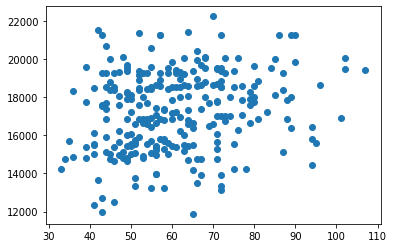

In [1]:
# First Ten Records of Datset

import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Teams.csv')

df = df.drop(df[df.year < 2000].index)
df = df.drop(df[df.lgID != "NHL"].index)

df['year'] = df['year'].astype('category')
df['lgID'] = df['lgID'].astype('category')
df['tmID'] = df['tmID'].astype('category')
df['confID'] = df['confID'].astype('category')
df['divID'] = df['divID'].astype('category')
df['playoff'] = df['playoff'].astype('category')
df['name'] = df['name'].astype('category')
df['rank'] = df['rank'].astype('category')

df = df.drop('franchID', 1)

attendance_df = pd.read_csv('attendance.csv')
# attendance_df.info()

def pull_city(full_name) :
    if ('New ' in full_name or 'St.' in full_name or 'Los' in full_name):
        name_split = full_name.split()
        return name_split[0] + ' ' + name_split[1]
    elif (' of ' not in full_name) :
        return full_name.split()[0]
    else :
        name_split = full_name.split()
        return name_split[len(name_split) - 1]


df['name'] = df['name'].map(lambda name: pull_city(name))


attendance_df['Rank'] = attendance_df['Rank'].astype('category')
attendance_df['Team'] = attendance_df['Team'].astype('category')
attendance_df['Year'] = attendance_df['Year'].astype('category')


attendance_df = attendance_df.drop('Home Percentage', 1)
attendance_df = attendance_df.drop('Road Percentage', 1)
attendance_df = attendance_df.drop('Percentage', 1)

combined_df = pd.merge(df, attendance_df,  how='right', left_on=['name','year'], right_on = ['Team','Year'])
combined_df = combined_df.drop('Year', 1)
combined_df = combined_df.drop('Games', 1)

combined_df.info()
# plt.scatter(x=combined_df["W"], y=combined_df["Home Total Attendance"])
plt.scatter(x=combined_df["PPG"], y=combined_df["Home Average Attendance"])


#### Team Member: Brady Cassada/Ben Giese

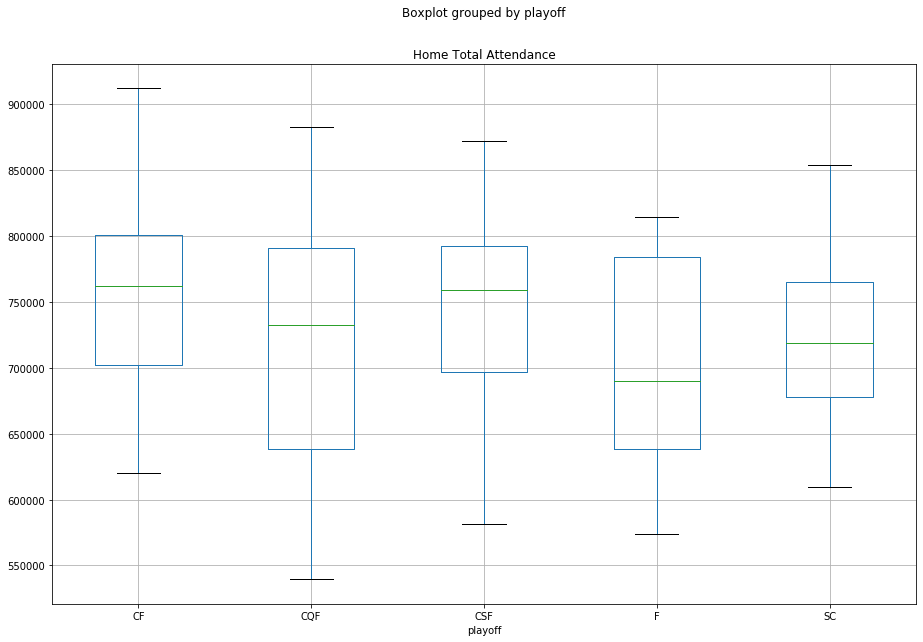

In [8]:
combined_df.boxplot(by="playoff", column="Home Total Attendance", figsize=(15,10))